In [2]:
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
mydata=pd.read_csv(r"C:\Users\Dell\Desktop\ML-programing\dataset\DataSets-master\DataSets-master\Mall_Customers.csv")

In [4]:
mydata

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
mydata.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


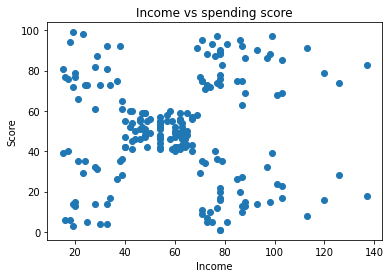

In [7]:
plt.scatter(mydata.iloc[:,3],mydata.iloc[:,4])
plt.title("Income vs spending score")
plt.xlabel("Income")
plt.ylabel("Score")
plt.show()

#### Encoding (Male=0,Female=1)

In [8]:
mydata.Genre=mydata.Genre.map({"Male":0,"Female":1})

In [9]:
mydata

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40
...,...,...,...,...,...
195,196,1,35,120,79
196,197,1,45,126,28
197,198,0,32,126,74
198,199,0,32,137,18


In [10]:
x_features=mydata.iloc[:,1:]

In [11]:
x_features

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


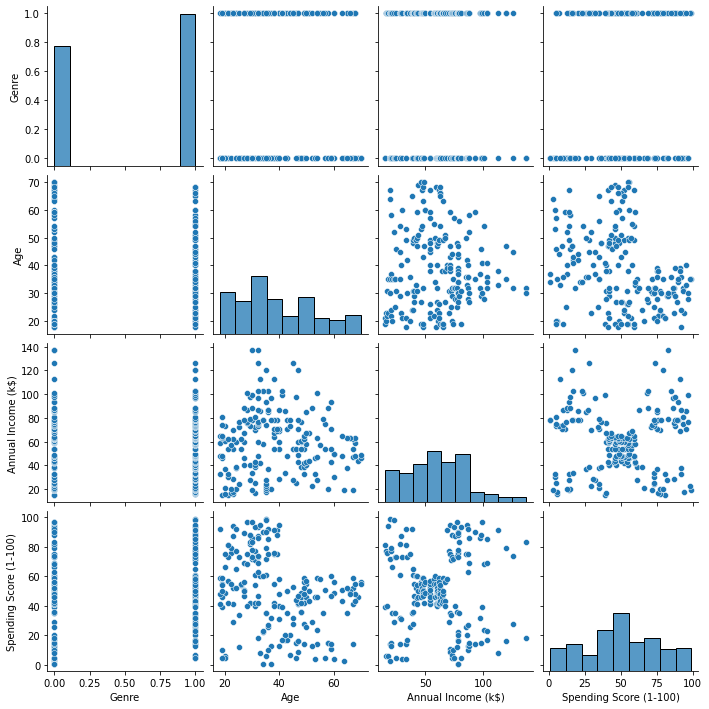

In [12]:
sb.pairplot(x_features)
plt.show()

In [13]:
# Clustering
# K=5

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmean_model=KMeans(n_clusters=5)
kmean_learner=kmean_model.fit(x_features)

In [17]:
kmean_learner.cluster_centers_

array([[ 0.59090909, 25.27272727, 25.72727273, 79.36363636],
       [ 0.5875    , 42.9375    , 55.0875    , 49.7125    ],
       [ 0.47222222, 40.66666667, 87.75      , 17.58333333],
       [ 0.53846154, 32.69230769, 86.53846154, 82.12820513],
       [ 0.60869565, 45.2173913 , 26.30434783, 20.91304348]])

In [18]:
kmean_learner.labels_

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 1,
       4, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 3, 1, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3])

In [19]:
kmean_learner.inertia_

75412.59682443162

In [20]:
#Assign data into cluster 5

In [26]:
x_features["Cluster_NO"]=kmean_learner.labels_

In [28]:
x_features.Cluster_NO=x_features.Cluster_NO.map({0:"c1",1:"c2",2:"c3",3:"c4",4:"c5"})

In [31]:
x_features.groupby("Cluster_NO").agg("std").T

Cluster_NO,c1,c2,c3,c4,c5
Genre,0.503236,0.495390,0.506309,0.505035,0.499011
Age,5.257030,16.429630,11.496583,3.728650,13.228607
Annual Income (k$),7.566731,8.844928,16.387059,16.312485,7.893811
Spending Score (1-100),10.504174,6.332943,10.204691,9.364489,13.017167
cluster_NO,0.000000,0.000000,0.000000,0.000000,0.000000


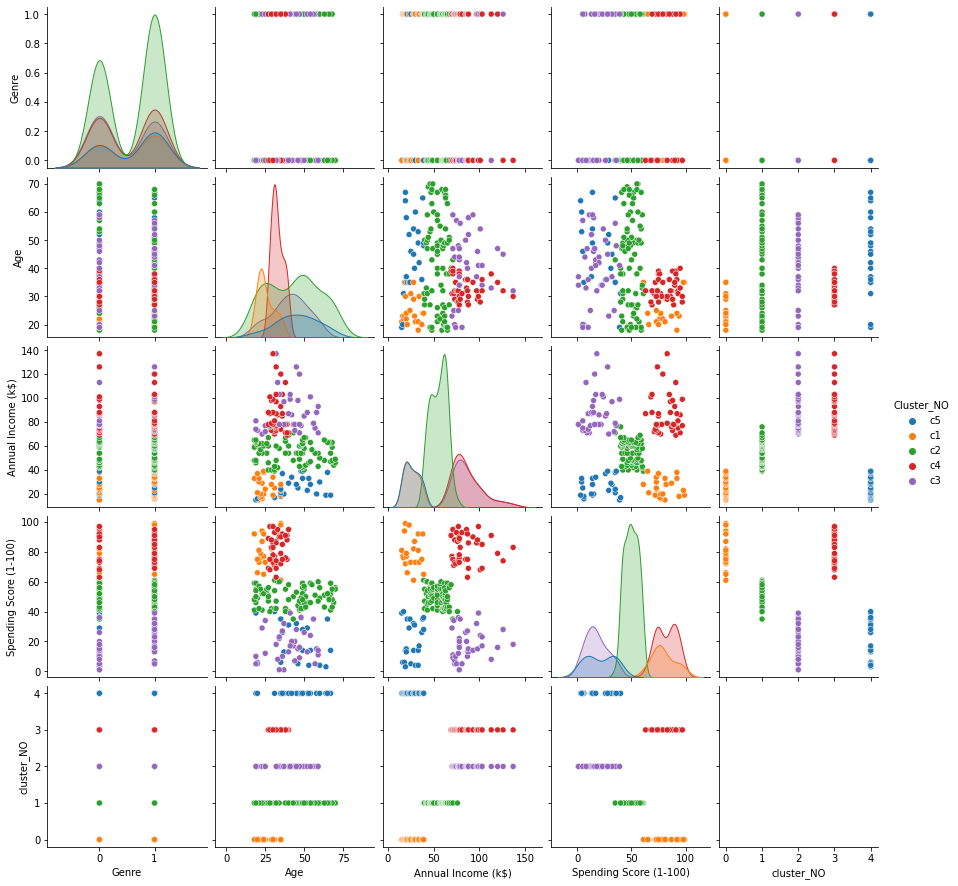

In [32]:
sb.pairplot(x_features,hue="Cluster_NO")
plt.show()

In [33]:
# number k

In [35]:
kmax=int(np.sqrt(len(x_features)))+1
krange=list(range(1,kmax))

In [36]:
list_wss=[]
for i in range(1,kmax):
    modelkmean=KMeans(n_clusters=i)
    modellearner=modelkmean.fit(x_features.iloc[:,0:4])
    wss=modellearner.inertia_
    list_wss.append(wss)

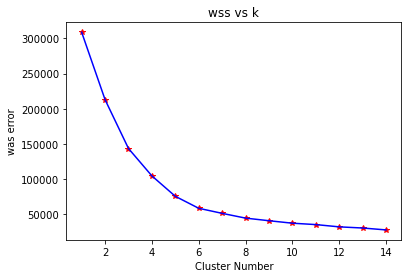

In [38]:
plt.plot(krange,list_wss,"r*")
plt.plot(krange,list_wss,"b")
plt.xlabel("Cluster Number")
plt.ylabel("was error")
plt.title("wss vs k")
plt.show()